In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot
from esda.moran import Moran
from esda.moran import Moran_Local

In [2]:
os.getcwd()

'/home/jovyan/work'

<AxesSubplot:>

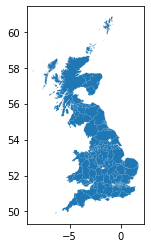

In [30]:
gdf = gpd.read_file('/home/jovyan/work/SDCshp.shp')
gdf.plot()

In [31]:
from pysal.lib import weights
from splot.esda import moran_scatterplot
y = gdf['meanPay'].values
w = weights.KNN.from_dataframe(gdf, k=5)
w.transform = 'R'
moran = Moran(y, w)
moran.I

0.7233128837851355

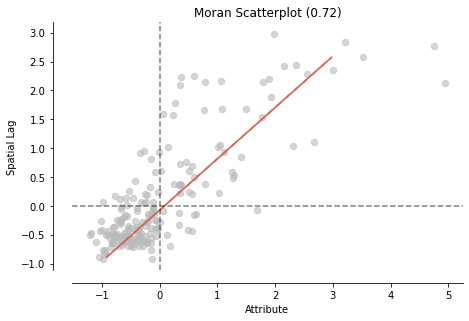

<Figure size 432x288 with 0 Axes>

In [33]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()
plt.savefig("moran.png")

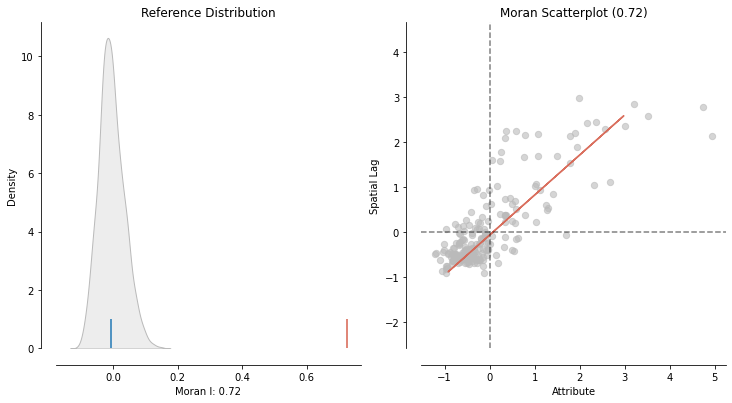

In [45]:
# from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(12,6))
plt.savefig("moran.png",dpi=300)
plt.show()

In [35]:
moran.p_sim

0.001

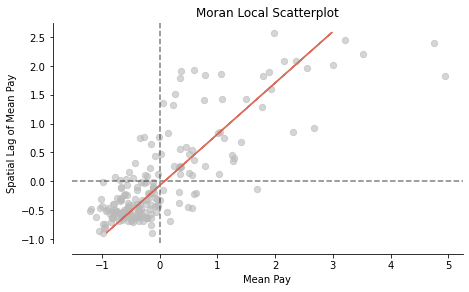

In [56]:
# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
#plt.figure(figsize=(15, 8))
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Mean Pay')
ax.set_ylabel('Spatial Lag of Mean Pay')
plt.savefig("local_moran.png",dpi=300,bbox_inches='tight')
plt.show()

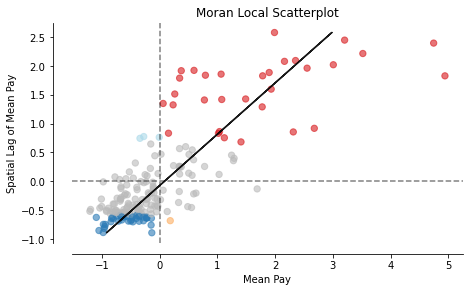

In [57]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Mean Pay')
ax.set_ylabel('Spatial Lag of Mean Pay')
plt.savefig("loc_moran_p.png",dpi=300,bbox_inches='tight')
plt.show()

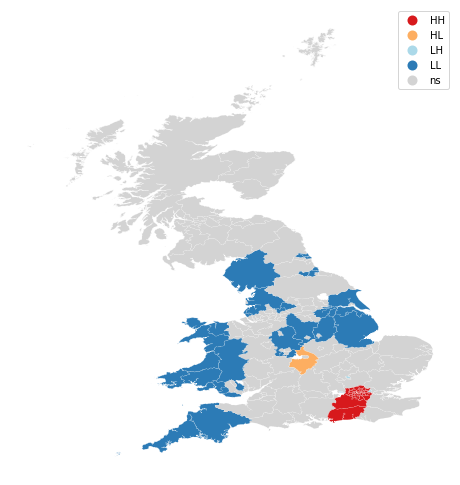

In [58]:
# from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (8,20))
plt.savefig("lisa_map.png",dpi=300,bbox_inches='tight')
plt.show()

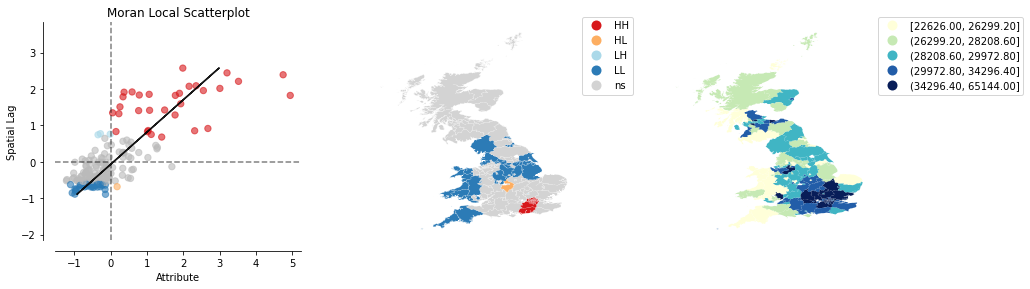

In [25]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, gdf, 'meanPay')
plt.show()